<a href="https://colab.research.google.com/github/vladislavpan1623/-1-/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_2_%D0%BF%D1%83%D0%BD%D0%BA%D1%82_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

3. Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію),
за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти
(наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer).
Проведіть класифікацію текстових даних, зробіть оцінку якості.

In [2]:
import pandas as pd
import io
from google.colab import files

# 1. Завантаження файлу
print("Крок 1: Завантажити файл")
uploaded = files.upload()

if not uploaded:
    print("Файл не було обрано.")
else:
    file_name = list(uploaded.keys())[0]
    # Використовуємо encoding='latin-1'
    df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin-1')

    # Очищення структури: видаляємо пусті колонки та перейменовуємо потрібні
    df = df.dropna(how="any", axis=1)
    df.columns = ['label', 'text']

    print(f"Файл {file_name} успішно завантажено!")
    print(df.head())

Крок 1: Завантажити файл


Saving spam.csv to spam.csv
Файл spam.csv успішно завантажено!
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def clean_text(text):
    # Перетворення в нижній регістр
    text = str(text).lower()
    # Видалення пунктуації та цифр
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    # Видалення стоп-слів
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    # Лематизація
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(w) for w in words])

print("Обробка тексту...")
df['cleaned_text'] = df['text'].apply(clean_text)
print("Передобробка завершена.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Обробка тексту...
Передобробка завершена.


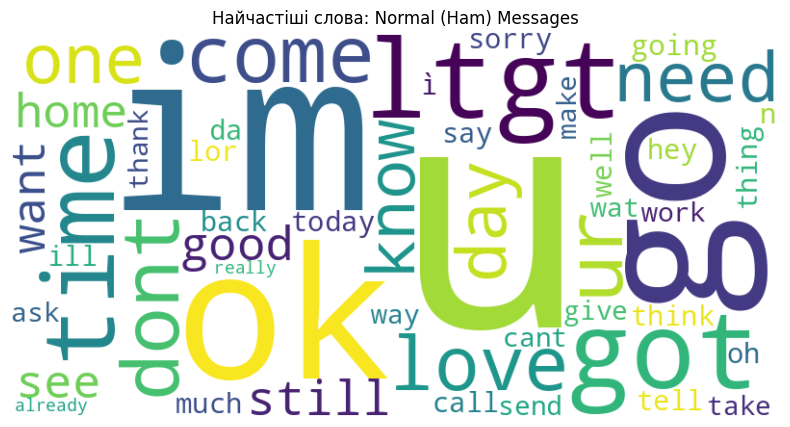

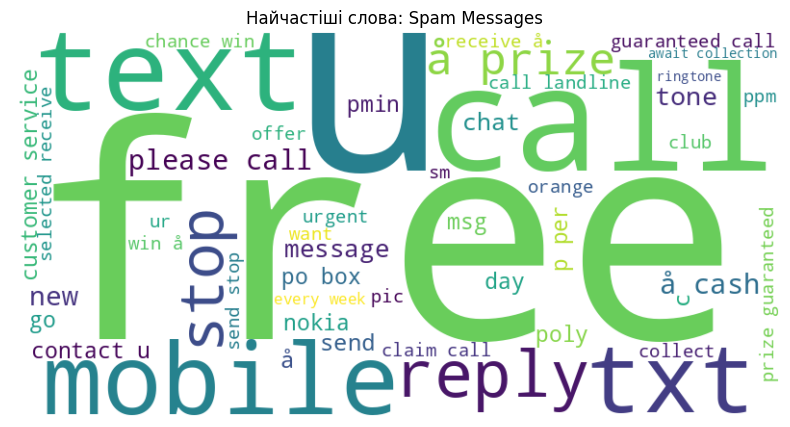

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(target_label, title):
    subset = df[df['label'] == target_label]
    text = " ".join(subset['cleaned_text'])
    wc = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Візуалізація для кожного класу
plot_wordcloud('ham', 'Найчастіші слова: Normal (Ham) Messages')
plot_wordcloud('spam', 'Найчастіші слова: Spam Messages')

Точність моделі (Accuracy): 0.9740

Детальний звіт:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.98      0.82      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



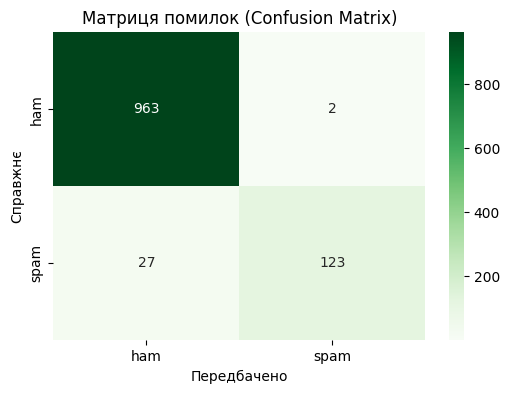

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Векторизація (TF-IDF) з використанням біграм (ngram_range 1-2)
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=3000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

# Розподіл на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Класифікація (Naive Bayes)
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Прогноз та оцінка
y_pred = clf.predict(X_test)

print(f"Точність моделі (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\nДетальний звіт:")
print(classification_report(y_test, y_pred))

# Матриця помилок
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Передбачено')
plt.ylabel('Справжнє')
plt.title('Матриця помилок (Confusion Matrix)')
plt.show()